(lgm-mixed-notebook)=
# LGM e modelli misti 

I modelli di crescita latente (LGM, Latent Growth Models) rappresentano una forma specializzata di analisi fattoriale confermativa (CFA) che si focalizza sull'evoluzione di costrutti nel tempo. Questi modelli si distinguono per la loro capacità di fissare le saturazioni fattoriali a valori predefiniti. Questo significa che si imposta in anticipo come ciascun fattore contribuisca alla varianza osservata nei dati raccolti in diversi momenti. In molti casi, la traiettoria di crescita nel tempo può essere descritta utilizzando una funzione lineare o quadratica, permettendo di modellare diversi tipi di evoluzioni, come un aumento costante o un cambiamento accelerato.

Un aspetto centrale dei LGM è il concetto di fattori di crescita, che rappresentano le differenze individuali all'interno dei dati longitudinali. Questi fattori di crescita sono rappresentati da variabili latenti continue, denominate *growth factors*. In pratica, permettono di catturare e quantificare variazioni individuali nel modo in cui i soggetti cambiano nel tempo, ad esempio, in termini di sviluppo delle competenze o dell'andamento di un sintomo.

Per facilitare una comprensione più approfondita dei modelli LGM, nel presente capitolo si propone un confronto con i modelli misti {cite:p}`hoffman2022catching`. Questo confronto mira a evidenziare le differenze e le somiglianze tra i due approcci, aiutando a discernere quando e perché scegliere un modello rispetto all'altro. Mentre i modelli misti possono essere utilizzati per analizzare dati gerarchici o nidificati, i modelli LGM si concentrano specificamente sull'analisi della traiettoria di crescita nel tempo, rendendoli particolarmente utili in studi longitudinali dove l'interesse primario è capire come un costrutto si sviluppa o cambia nel corso del tempo.

In [1]:
source("../_common.R")
suppressPackageStartupMessages({
    library("DT")
    library("kableExtra")
    library("lme4")
})

## Modelli misti

I modelli lineari generalizzati classici presuppongono l'indipendenza delle osservazioni, un'ipotesi che può non essere valida in contesti dove si effettuano misurazioni ripetute sullo stesso soggetto nel tempo, portando a osservazioni correlate. In questi scenari, si ricorre all'uso di modelli lineari a effetti misti (o modelli gerarchici lineari), che consentono di gestire adeguatamente la correlazione intragruppo.

Nei modelli a effetti misti, si realizza un equilibrio tra i due approcci estremi di modellazione: la modellazione aggregata (o pooled) e la modellazione separata (o per gruppo). La modellazione aggregata tratta l'insieme dei dati come un unico gruppo, ignorando le differenze intergruppo e potenzialmente perdendo informazioni rilevanti sulla variabilità tra i gruppi. La modellazione separata, d'altra parte, adatta un modello distinto per ciascun gruppo, potendo portare a sovrapparametrizzazione e ridotta capacità di generalizzazione.

I modelli a effetti misti superano queste limitazioni integrando elementi sia della modellazione aggregata sia della modellazione separata. Ciò consente di considerare sia le differenze tra gruppi (variabilità intergruppo) sia l'informazione comune (variabilità intragruppo), migliorando la precisione delle stime dei parametri. Tradizionalmente, i dati rilevati all'interno di un soggetto sono classificati come dati di *Livello 1*, mentre i dati raccolti tra soggetti diversi sono definiti dati di *Livello 2*.

Analogamente ai modelli di regressione lineari tradizionali, i modelli a effetti misti includono un'intercetta fissa, coefficienti fissi per i predittori e un termine di errore per la deviazione tra i valori osservati e quelli predetti dal modello. Tuttavia, a differenza dei modelli lineari standard, in un modello a effetti misti, l'intercetta e i coefficienti dei predittori possono variare tra le unità di analisi, permettendo una maggiore flessibilità e adattabilità nel rappresentare la struttura dei dati. Questo approccio rende i modelli a effetti misti particolarmente adatti per l'analisi di dati longitudinali o gerarchici, dove è necessario tener conto della correlazione tra osservazioni all'interno dello stesso gruppo o soggetto.


Il modello lineare multilivello, applicato all'analisi di dati strutturati in gruppi o cluster, permette una comprensione dettagliata della variazione sia all'interno dei gruppi (within-group variation) sia tra i gruppi (between-group variation). Formalmente, consideriamo un'unità statistica $i$ all'interno di un gruppo $j$ (dove $i = 1, ..., n_j$ e $j = 1, ..., N$), per un totale di $N$ gruppi ciascuno con numerosità $n_j$. 

Per una variabile dipendente $Y$, una variabile indipendente a livello individuale $x$ e una variabile di gruppo $z$, il modello si articola su due livelli. Il primo livello è rappresentato dalla seguente equazione lineare:

$$
Y_{ij} = \beta_{0j} + \beta_{1j}x_{ij} + \varepsilon_{ij}.
$$

Questa equazione descrive la relazione tra $Y$ e $x$ per ogni unità $i$ nel gruppo $j$, dove $\beta_{0j}$ è l'intercetta e $\beta_{1j}$ la pendenza, specifiche per ciascun gruppo $j$. Il termine d'errore $\varepsilon_{ij}$ è assunto normalmente distribuito con media zero e varianza costante $\sigma^2$.

Il secondo livello del modello esplicita come l'intercetta $\beta_{0j}$ e la pendenza $\beta_{1j}$ varino tra i gruppi in relazione alla variabile di gruppo $z$

$$
\beta_{0j} = \gamma_{00} + \gamma_{01}z_j + U_{0j}
$$

$$
\beta_{1j} = \gamma_{10} + \gamma_{11}z_j + U_{1j}
$$

dove:

1. **$\gamma_{00}$** rappresenta l'intercetta media a livello di gruppo. In altre parole, è il valore previsto di $Y$ quando tutte le variabili indipendenti ($x$ e $z$) sono pari a zero. È una sorta di "punto di partenza" medio per i vari gruppi nel modello.

2. **$\gamma_{01}$** è il coefficiente di pendenza che descrive come l'intercetta varia tra i gruppi in relazione alla variabile di gruppo $z$. In pratica, $\gamma_{01}$ moltiplica la variabile di gruppo $z_j$ (per ogni gruppo $j$) per quantificare l'influenza di questa variabile sulla variazione dell'intercetta tra i gruppi. Un valore positivo di $\gamma_{01}$ indica che un aumento in $z_j$ è associato a un aumento dell'intercetta di $Y$, mentre un valore negativo indica il contrario.

3. **$\gamma_{10}$** rappresenta il valore medio della pendenza della relazione tra $Y$ e $x$ attraverso tutti i gruppi, quando la variabile di gruppo $z$ è zero. Indica come, in media, la variabile indipendente a livello individuale $x$ si relaziona con $Y$ nei diversi gruppi.

4. **$\gamma_{11}$** modella come la relazione (pendenza) tra $Y$ e $x$ varia tra i gruppi in funzione della variabile di gruppo $z$. Analogamente a $\gamma_{01}$, questo coefficiente moltiplica $z_j$ per mostrare l'effetto di $z$ sulla pendenza di $Y$ rispetto a $x$ tra i gruppi. Se $\gamma_{11}$ è significativo, indica che l'effetto di $x$ su $Y$ non è costante tra i gruppi, ma varia in base al valore di $z$.

In sintesi, questi coefficienti permettono di comprendere non solo come varia la relazione tra $Y$ e $x$ all'interno di ciascun gruppo (grazie a $\gamma_{10}$), ma anche come questa relazione sia influenzata dalla variabile di gruppo $z$ (mediante $\gamma_{11}$). Allo stesso modo, essi illustrano come l'intercetta di $Y$ varia tra i gruppi in base a $z$ ($\gamma_{01}$), oltre a fornire un valore di intercetta medio ($\gamma_{00}$).

Queste equazioni legano le variazioni di $\beta_{0j}$ e $\beta_{1j}$ tra i gruppi alla variabile $z$. I termini $U_{0j}$ e $U_{1j}$ rappresentano l'errore a livello di gruppo, anch'essi assunti normalmente distribuiti con media zero e varianze costanti $\tau_0^2$ e $\tau_1^2$, rispettivamente, e indipendenti dall'errore a livello individuale $\varepsilon_{ij}$.

Il modello multilivello permette così di analizzare come le caratteristiche di gruppo (come $z$) influenzano non solo l'intercetta (il livello di base di $Y$) ma anche la relazione tra $Y$ e $x$ (la pendenza). In altre parole, consente di esplorare come la relazione tra una variabile dipendente e indipendente possa cambiare da un gruppo all'altro.

Un elemento chiave di questo approccio è il coefficiente di correlazione intragruppo $\rho(Y \mid x)$, definito come:

$$
\rho(Y \mid x) = \frac{\tau_0^2}{\tau_0^2 + \sigma^2}
$$

Il coefficiente di correlazione intragruppo misura la proporzione della varianza totale di $Y$ attribuibile alle differenze tra i gruppi. Un valore di $\rho$ vicino a 1 indica che la maggior parte della varianza di $Y$ è spiegata dalle differenze tra i gruppi, mentre un valore vicino a 0 suggerisce che la varianza è prevalentemente dovuta a differenze all'interno dei singoli gruppi. Questo coefficiente fornisce quindi una misura quantitativa dell'importanza relativa delle variazioni tra e all'interno dei gruppi nel modello.

## Simulare effetti casuali

Esaminiamo con una simulazione una dimostrazione del funzionamento dei modelli misti. Ciò ci permetterà di meglio comprendere i modelli a crescita latente. Simuleremo dei dati bilanciati, con punteggi su quattro rilevazioni temporali per 500 individui (soggetti). Esamineremo il tasso di crescita ('growth') e consentiremo la presenza di intercette e pendenze specifiche per i diversi soggetti.

Le istruzioni seguenti generano i dati (per i nostri scopi, non è importante capire i dettagli di questa porzione di codice).

In [2]:
set.seed(12345)
n <- 500
timepoints <- 4
time <- rep(0:3, times = n)
subject <- rep(1:n, each = 4)

intercept <- .5
slope <- .25
randomEffectsCorr <- matrix(c(1, .2, .2, 1), ncol = 2)

randomEffects <- MASS::mvrnorm(
  n,
  mu = c(0, 0), Sigma = randomEffectsCorr, empirical = T
) %>%
  data.frame()

colnames(randomEffects) <- c("Int", "Slope")

Nella simulazione, abbiamo impostato gli effetti fissi, che comprendono l'intercetta e la pendenza della regressione lineare standard, ai valori di 0.5 e 0.25 rispettivamente. Inoltre, è stata simulata una correlazione di 0.2 tra l'intercetta e la pendenza che sono specifiche per ogni singolo soggetto. A causa di questa correlazione, i dati sono stati generati utilizzando una distribuzione normale multivariata. In questo contesto, abbiamo assegnato una varianza di 1 sia per l'intercetta sia per la pendenza.

Procediamo ora con l'analisi dei dati risultanti dalla simulazione. Questo passaggio è fondamentale per comprendere le implicazioni dei parametri scelti nella simulazione e per verificare se i dati generati rispecchiano le aspettative teoriche stabilite inizialmente.

I dati prodotti fino ad ora sono i seguenti:

In [3]:
data.frame(
    Subject = subject, 
    time = time, 
    randomEffects[subject, ]
) |>
    head(10)

,Subject,time,Int,Slope
,<int>,<int>,<dbl>,<dbl>
1,1,0,-1.3322902,-0.9548087
1.1,1,1,-1.3322902,-0.9548087
1.2,1,2,-1.3322902,-0.9548087
1.3,1,3,-1.3322902,-0.9548087
2,2,0,-2.1261548,-1.7813625
2.1,2,1,-2.1261548,-1.7813625
2.2,2,2,-2.1261548,-1.7813625
2.3,2,3,-2.1261548,-1.7813625
3,3,0,0.4606242,0.3039838


Per generare la variabile target, procediamo sommando gli effetti casuali, precedentemente calcolati, all'intercetta globale e applichiamo un analogo procedimento alle pendenze. In aggiunta, introduciamo un rumore gaussiano ai dati, caratterizzato da una deviazione standard $\sigma$ pari a 0.5. Questa operazione ha lo scopo di aggiungere un livello di variabilità realistica e di incertezza ai dati, rendendo la simulazione più vicina a scenari osservati nella realtà pratica.

In [4]:
set.seed(12345)
sigma <- .5
y1 <- 
  (intercept + randomEffects$Int[subject]) + # random intercepts
  (slope + randomEffects$Slope[subject]) * time + # random slopes
  rnorm(n * timepoints, mean = 0, sd = sigma) # noise

d <- data.frame(subject, time, y1)

In [5]:
d |>
  head(10) 

,subject,time,y1
,<int>,<int>,<dbl>
1,1,0,-0.5395258
2,1,1,-1.1823659
3,1,2,-2.2965593
4,1,3,-3.1734649
5,2,0,-1.3232110
6,2,1,-4.0664952
7,2,2,-4.3738304
8,2,3,-6.3583342
9,3,0,0.8185443


Il grafico seguente mostra le rette di regressione per ciascuno dei 500 soggetti.

`geom_smooth()` using formula = 'y ~ x'


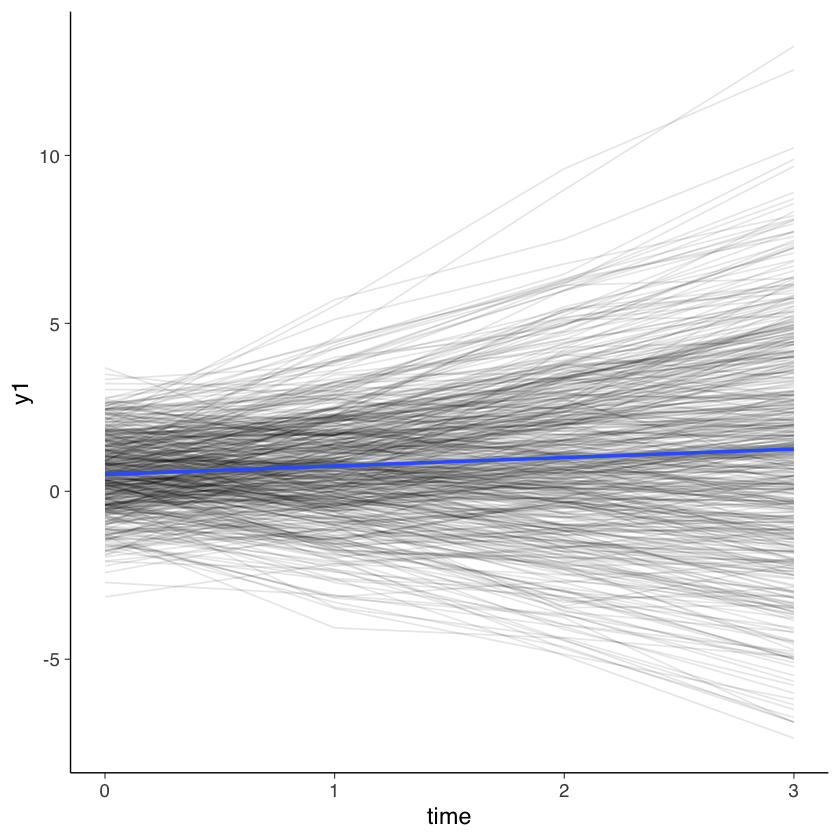

In [6]:
ggplot(d, aes(x = time, y = y1)) +
  geom_path(aes(group = subject), alpha = .1) +
  geom_smooth(method = "lm")

Adattiamo ai dati un modello misto utilizzando la funzione `lmer` del pacchetto `lme4`. Si noti che questo è un modello in cui solo le intercette sono consentite variare tra i cluster.

In [7]:
m0 <- lmer(y1 ~ 1 + (1 | subject), data = d)

Le componenti di varianza del modello si estraggono con la funzione `VarCorr()`.

In [8]:
VarCorr(m0)

 Groups   Name        Std.Dev.
 subject  (Intercept) 1.8306  
 Residual             1.4352  

Calcoliamo il coefficiente di correlazione intraclasse.

In [9]:
1.8306^2 / (1.8306^2 + 1.4352^2)

[1] 0.6193238

Laddove 

In [10]:
(1.8306^2 + 1.4352^2)

[1] 5.410895

è uguale alla varianza della variabile risposta

In [11]:
var(d$y1)

[1] 5.405844

Lo stesso risultato si ottiene utilizzando una funzione `R` per il calcolo della correlazione intraclasse.

In [12]:
multilevelTools::iccMixed(
  dv = "y1",
  id = c("subject"),
  data = d
) |>
  print()

        Var    Sigma       ICC
1:  subject 3.350987 0.6193062
2: Residual 2.059886 0.3806938


In [13]:
0.6193062 + 0.3806938

[1] 1

Esaminiamo ora un modello in cui sia le intercette sia le pendenze variano tra i cluster.

In [14]:
mix_mod <- lmer(y1 ~ time + (1 + time | subject), data = d)
summary(mix_mod) |>
    print()

Linear mixed model fit by REML ['lmerMod']
Formula: y1 ~ time + (1 + time | subject)
   Data: d

REML criterion at convergence: 5881.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.03499 -0.46249  0.00414  0.48241  2.74992 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 subject  (Intercept) 1.0245   1.0122       
          time        1.0301   1.0149   0.15
 Residual             0.2412   0.4911       
Number of obs: 2000, groups:  subject, 500

Fixed effects:
            Estimate Std. Error t value
(Intercept)  0.50159    0.04885  10.267
time         0.25157    0.04644   5.417

Correlation of Fixed Effects:
     (Intr)
time 0.072 


Gli effetti fissi che abbiamo ottenuto ($\alpha$ = 0.50159, $\beta$ = 0.25157) sono simili ai valori che abbiamo impostato nella simulazione per l'intercetta e la pendenza globale. 

In [15]:
VarCorr(mix_mod)

 Groups   Name        Std.Dev. Corr 
 subject  (Intercept) 1.01217       
          time        1.01494  0.150
 Residual             0.49108       

Le varianze degli effetti casuali stimati ($1.0122^2$, $1.0149^2$) sono molto simili al valore impostato di 1 nella simulazione, la correlazione (0.15) è simile al valore impostato di 0.2 e la deviazione standard dei residui (0.4911) è simile al valore impostato di 0.5.

## Modello di crescita latente

<!-- https://github.com/m-clark/sem/blob/master/growth-curves.Rmd -->

Esploriamo ora l'analisi degli stessi dati tramite un modello di crescita latente (LGM). I modelli LGM possono essere considerati come un'estensione dei modelli CFA, in cui si ipotizzano due fattori latenti principali: il primo è una variabile latente associata alle intercette casuali, cioè rappresenta la variazione delle intercette individuali dei partecipanti; il secondo è una variabile latente relativa alle pendenze casuali, che descrive la variazione delle pendenze individuali dei partecipanti. Queste intercette e pendenze si riferiscono alla linea di regressione che descrive per ciascun partecipante la relazione tra la variabile in esame e il tempo.

In quanto il modello mira a spiegare la relazione tra le medie dei punteggi dei partecipanti nel tempo, è necessario analizzare i dati grezzi piuttosto che la matrice di covarianza campionaria. Ciò significa utilizzare le osservazioni individuali per ciascun partecipante come input.

Per l'analisi, utilizzeremo nuovamente il software `lavaan`, ma con una sintassi differente per poter fissare le saturazioni fattoriali a valori specifici, come richiesto dai vincoli del modello LGM. Di conseguenza, l'output che otterremo sarà diverso da quello dei modelli SEM standard, poiché i parametri relativi alle saturazioni fattoriali sono fissi e non stimati.

Per il fattore che rappresenta le intercette, le saturazioni fattoriali sono impostate a 1. Questo valore può essere interpretato come l'equivalente della colonna dell'intercetta nella matrice $\boldsymbol{X}$ di un modello di regressione multipla.

Le saturazioni per il fattore che definisce le pendenze casuali sono stabilite in base alla sequenza temporale delle misurazioni $y$, con valori $\lambda$ che vanno da 0 a 3. Questi riflettono gli intervalli temporali delle misurazioni. Iniziare la codifica da 0 conferisce un significato interpretabile allo zero, analogamente ai valori che, nella matrice $\boldsymbol{X}$ di un modello di regressione multipla, corrisponderebbero alla colonna della pendenza.

Il modello di crescita latente (LGM) espresso dalla formula 

$$
y_j = \alpha_0 + \alpha_1 \lambda_j + \zeta_{00} + \zeta_{11} \lambda_j + \epsilon_j
$$

può essere messo in relazione con il modello lineare ad effetti misti precedentemente descritto attraverso la comprensione della struttura dei due modelli e delle loro componenti.

1. **Interpretazione dei Componenti del Modello LGM**:
   - $ \alpha_0 $: Rappresenta l'intercetta media del modello di crescita.
   - $ \alpha_1 \lambda_j $: Rappresenta il tasso medio di crescita nel tempo, dove $ \lambda_j $ sono i valori che descrivono l'intervallo temporale delle misurazioni.
   - $ \zeta_{00} $: Indica la variazione delle intercette individuali tra i soggetti rispetto all'intercetta media $ \alpha_0 $.
   - $ \zeta_{11} \lambda_j $: Esprime la variazione nelle pendenze individuali (tassi di crescita) tra i soggetti rispetto al tasso medio di crescita $ \alpha_1 $.
   - $ \epsilon_j $: Rappresenta l'errore di misurazione per ogni singolo soggetto.

2. **Confronto con il Modello Lineare ad Effetti Misti**:
   - Nel modello lineare ad effetti misti, si considerano sia effetti fissi (come l'intercetta e la pendenza media del modello) sia effetti casuali (variazione delle intercette e delle pendenze tra i soggetti). In maniera simile, il modello LGM considera l'intercetta media e il tasso medio di crescita (effetti fissi) e permette la variazione individuale in queste componenti (effetti casuali).
   - La componente $ \zeta_{00} $ nel modello LGM è analoga alla variazione casuale delle intercette nel modello ad effetti misti, mentre $ \zeta_{11} $ corrisponde alla variazione casuale delle pendenze.
   - Entrambi i modelli permettono di analizzare dati strutturati longitudinalmente, offrendo la flessibilità di modellare non solo la tendenza generale (effetti fissi) ma anche la variazione individuale intorno a questa tendenza (effetti casuali).

In sintesi, il modello LGM può essere visto come un caso speciale o un'estensione del modello lineare ad effetti misti, con un'enfasi particolare sulla modellazione del cambiamento nel tempo e sulla relazione di questa dinamica con variabili latenti. Entrambi i modelli sono strumenti potenti nell'analisi di dati longitudinali, permettendo di esaminare sia la tendenza centrale sia la variabilità individuale all'interno dei dati.

Un requisito degli LGM è che i dati devono essere forniti del formato *wide* (mentre per il precedente modello misto abbiamo usato il formato *long*), il che significa che ogni colonna rappresenta la variabile di esito in un diverso momento nel tempo. Si presume che ogni osservazione o riga sia indipendente dalle altre; le colonne mostrano invece una dipendenza temporale. Trasformiamo dunque i dati nel formato richiesto.

In [16]:
dwide <- d %>%
  spread(time, y1) %>%
  rename_at(vars(-subject), function(x) paste0("y", x))
head(dwide)

,subject,y0,y1,y2,y3
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,-0.5395258,-1.1823659,-2.2965593,-3.173465
2,2,-1.3232110,-4.0664952,-4.3738304,-6.358334
3,3,0.8185443,1.0549470,2.0104678,3.531232
4,4,0.4469440,-0.3162615,-1.7896354,-1.843919
5,5,1.8959902,5.5259110,9.6045869,12.546123
6,6,2.1829579,1.6287374,-0.3136214,-1.660328


Il modello misto che abbiamo descritto in precedenza corrisponde dunque ad un modello fattoriale con due variabili latenti: un fattore ($\eta_0$) che rappresenta il "punteggio vero" delle intercette individuali e un fattore ($\eta_1$) che rappresenta il "punteggio vero" delle pendenze delle rette di regressione per i singoli individui.

Nella sintassi di `lavaan` il modello diventa:

In [17]:
model <- "
    i =~ 1*y0 + 1*y1 + 1*y2 + 1*y3
    s =~ 0*y0 + 1*y1 + 2*y2 + 3*y3
"

Possiamo adattare il modello ai dati usando una funzione specifica di `lavaan`, ovvero `growth`, che può essere usata per questa classe di modelli. 

In [18]:
growth_curve_model <- growth(model, data = dwide)

In [19]:
summary(growth_curve_model) |>
    print()

lavaan 0.6.16 ended normally after 41 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         9

  Number of observations                           500

Model Test User Model:
                                                      
  Test statistic                                 4.212
  Degrees of freedom                                 5
  P-value (Chi-square)                           0.519

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Latent Variables:
                   Estimate  Std.Err  z-value  P(>|z|)
  i =~                                                
    y0                1.000                           
    y1                1.000                           
    y2                1.000                           
   

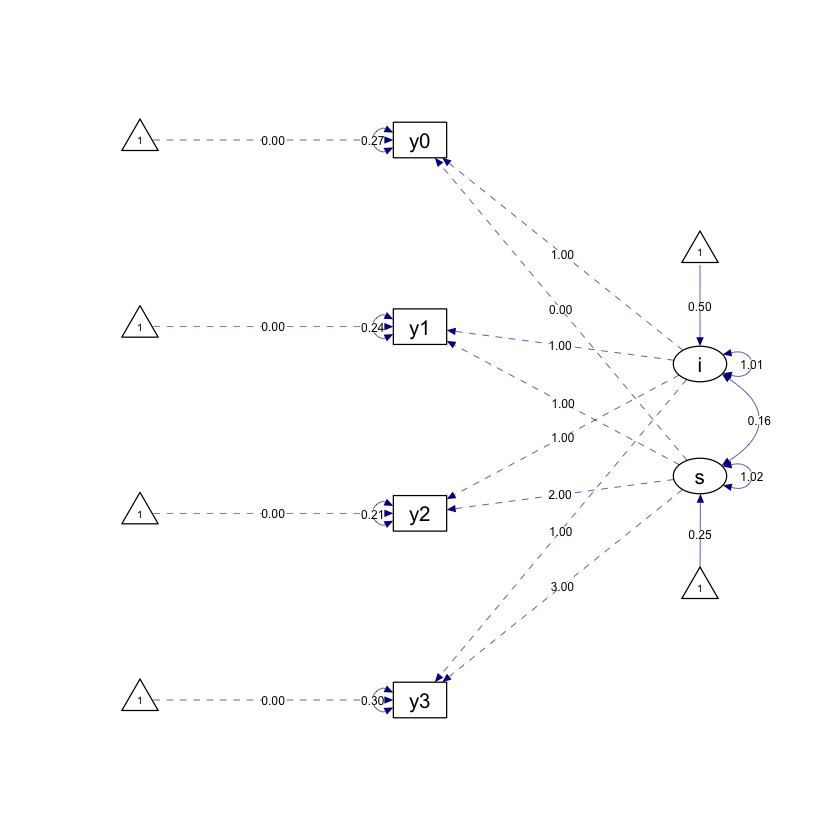

In [20]:
growth_curve_model |>
    semPaths(
        style = "ram",
        whatLabels = "par", edge.label.cex = .6,
        label.prop = 0.9, edge.label.color = "black", rotation = 4,
        equalizeManifests = FALSE, optimizeLatRes = TRUE,
        node.width = 1.5,
        edge.width = 0.5, shapeMan = "rectangle", shapeLat = "ellipse",
        shapeInt = "triangle", sizeMan = 4, sizeInt = 2, sizeLat = 4,
        curve = 2, unCol = "#070b8c"
    )

Usiamo l’oggetto creato da `growth` per creare un diagramma di percorso.

## Comparazione tra Modelli a Effetti Misti e Modelli di Crescita Latente

Nell'output del metodo `growth()`, la sezione denominata `Intercepts` rappresenta in realtà gli effetti fissi all'interno del contesto di un modello a effetti misti:

```
Intercepts:
                   Estimate  Std.Err  z-value  P(>|z|)
    i                 0.510    0.048   10.542    0.000
    s                 0.234    0.046    5.133    0.000
```

Può apparire inizialmente non intuitivo riferirsi agli effetti fissi come 'intercette' in un modello a effetti misti. Tuttavia, questa terminologia diventa più chiara quando consideriamo la parametrizzazione del modello di crescita latente (LGM). In un modello LGM, 'i' rappresenta l'intercetta generale del modello (cioè, il punto di partenza medio per tutti i soggetti), mentre 's' indica la pendenza media, ovvero il tasso di crescita o di cambiamento nel tempo.

È interessante notare come le stime riportate qui siano molto vicine a quelle che si ottengono in un modello a effetti misti. Questa similitudine dimostra l'affinità tra i due approcci di modellazione: entrambi mirano a comprendere e quantificare sia gli effetti generali (come la tendenza media di crescita) sia le variazioni individuali all'interno di un insieme di dati longitudinali. In entrambi i casi, l'intercetta e la pendenza giocano ruoli cruciali nell'interpretazione dei modelli e nella comprensione di come i valori della variabile dipendente evolvano nel tempo.

In [21]:
print(fixef(mix_mod))

(Intercept)        time 
  0.5015932   0.2515722 


Si noti inoltre che le stime degli effetti fissi del modello misto sono identiche a quelle che vengono trovate usando un modello di regressione standard:

In [22]:
lm(y1 ~ time, data = d)


Call:
lm(formula = y1 ~ time, data = d)

Coefficients:
(Intercept)         time  
     0.5016       0.2516  


Consideriamo ora le stime della varianza nel modello a crescita latente.

```
Covariances:
                   Estimate  Std.Err  z-value  P(>|z|)
  i ~~                                                
    s                 0.220    0.050    4.371    0.000
Variances:
                   Estimate  Std.Err  z-value  P(>|z|)
   .y0                0.310    0.042    7.308    0.000
   .y1                0.220    0.021   10.338    0.000
   .y2                0.230    0.029    7.935    0.000
   .y3                0.275    0.064    4.295    0.000
    i                 0.973    0.076   12.854    0.000
    s                 0.986    0.066   14.889    0.000
```

Confrontiamo questi valori con quelli ottenuti dal modello misto.

In [23]:
VarCorr(mix_mod) |>
    print()

 Groups   Name        Std.Dev. Corr 
 subject  (Intercept) 1.01217       
          time        1.01494  0.150
 Residual             0.49108       


Si noti che il modello a crescita latente, per impostazione predefinita, assume una varianza eterogenea per ogni rilevazione temporale. I modelli misti, invece, per impostazione predefinita assumono la stessa varianza per ogni punto temporale. È però possibile specificare una stima separata della varianza nelle diverse rilevazioni temporali. 

Se però vincoliamo le varianze ad essere uguali per ciascuna rilevazione temporale nel modello LGM, i due modelli producono delle stime identiche. La sintassi seguente viene utilizzata per forzare l'uguaglianza delle varianze in ciascuna rilevazione temporale.

In [24]:
model <- "
    # intercept and slope with fixed coefficients
    i =~ 1*y0 + 1*y1 + 1*y2 + 1*y3
    s =~ 0*y0 + 1*y1 + 2*y2 + 3*y3
    y0 ~~ resvar*y0
    y1 ~~ resvar*y1
    y2 ~~ resvar*y2
    y3 ~~ resvar*y3
"

Adattiamo il nuovo modello ai dati.

In [25]:
growth_curve_model <- growth(model, data = dwide)

Esaminiamo i risultati.

In [26]:
summary(growth_curve_model) |>
    print()

lavaan 0.6.16 ended normally after 27 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         9
  Number of equality constraints                     3

  Number of observations                           500

Model Test User Model:
                                                      
  Test statistic                                 6.180
  Degrees of freedom                                 8
  P-value (Chi-square)                           0.627

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Latent Variables:
                   Estimate  Std.Err  z-value  P(>|z|)
  i =~                                                
    y0                1.000                           
    y1                1.000                           
   

Per `lme4` abbiamo: 

In [27]:
print(VarCorr(mix_mod), comp = "Var")

 Groups   Name        Variance Cov  
 subject  (Intercept) 1.02448       
          time        1.03011  0.154
 Residual             0.24116       


In entrambi i casi, la varianza residua è uguale a 0.241 e la correlazione tra intercette e pendenze casuali è uguale a 0.154.

Inoltre, le stime dei coefficienti casuali del modello misto sono identiche a quelle delle variabili latenti. 

In [28]:
coef(mix_mod)[[1]] |> 
    head()

,(Intercept),time
,<dbl>,<dbl>
1,-0.3967486,-0.9050565
2,-1.5328622,-1.5945199
3,0.5429873,0.8759706
4,0.3095727,-0.7887484
5,2.0327226,3.5319068
6,2.0645454,-1.1411935


In [29]:
lavPredict(growth_curve_model) |>
    head()

i,s
-0.3966515,-0.9050631
-1.5324914,-1.5946260
0.5430942,0.8759036
0.3094388,-0.7886563
2.0328124,3.5317637
2.0637121,-1.1407804


## Conclusioni

In conclusione, abbiamo visto che, nel caso più semplice in cui viene assunta la stessa varianza per ogni punto temporale, i modelli LGM producono risultati identici ai modelli misti. Tuttavia, la concettualizzazione del cambiamento nei termini di un modello a crescita latente offre molti vantaggi rispetto alla descrizione dei dati nei termini dei modelli misti in quanto i modelli LGM sono più flessibili e consentono la verifica di ipotesi statistiche che non possono essere esaminate nel contesto dei modelli misti.